# Trabajo Final Integrador: Análisis de datos del Titanic.


## Introduccion

El presente trabajo tiene como objetivo utilizar los conceptos aprendidos en clase sobre estadística
descriptiva e inferencia estadística aplicandolos sobre un conjunto de datos obtenido del repositorio Kaggle. La base de datos seleccionada corresponde a los pasajeros del Titanic. El enfoque principal del análisis se centra en evaluar cómo la edad influyo en las probabilidades de supervivencia durante el desastre. Teniendo presente que esto es uno de los multiples factores de supervivencia de la catastrofe.

## Desarrollo del trabajo

### Primera Parte: Estadística Descriptiva


En esta etapa, se organizó la variable edad en una tabla de distribución de frecuencias, dividiéndola en intervalos específicos (0-20, 21-40, etc.). Se calcularon las frecuencias absolutas, relativas y acumuladas, lo que permitió observar cómo se distribuyen las edades en la muestra para luego compararlo con los sobreviventes y tener una distribución de frecuencias de Edad y supervivencia.

In [ ]:
#Se importa las librerias que se utilizaran
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Dataframe con ruta o link, para ejecutar en cualquier lugar con raw de github.
df = pd.read_excel('https://github.com/lopezeliasg/TUP-UTN-FRRE/raw/refs/heads/main/Probabilidad%20y%20Estad%C3%ADstica/Titanic.xlsx', engine='openpyxl')

In [ ]:
#Cantidad de valores nulos
df['Age'].isnull().sum()

86

In [ ]:
# Crear intervalos para la edad
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

df['Edad_Categorica'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calcular las frecuencias absolutas, relativas y acumuladas
frecuencias = df['Edad_Categorica'].value_counts().sort_index()
frecuencias_relativas = frecuencias / len(df)
frecuencias_acumuladas = frecuencias.cumsum()

# Crear la tabla de distribución de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencias,
    'Frecuencia Relativa': frecuencias_relativas,
    'Frecuencia Acumulada': frecuencias_acumuladas
})

# Mostrar la tabla
tabla_frecuencias


,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
Edad_Categorica,,,
0-20,61,0.145933,61
21-40,189,0.452153,250
41-60,68,0.162679,318
61-80,14,0.033493,332
81-100,0,0.000000,332


La mayoría de los pasajeros tienen edades entre 21 y 40 años (45.22%), lo que refleja que probablemente este rango de edad predominaba en quienes viajaban en el Titanic.
Los pasajeros más jóvenes (0-20 años) también son un grupo significativo (14.59%), probablemente compuesto por niños y adolescentes que viajaban con sus familias.
A medida que aumenta la edad, la cantidad de pasajeros disminuye, siendo los grupos de mayores de 60 años los menos representados (solo 14 personas).
No se registran pasajeros con más de 80 años en la base de datos analizada.

Calculos de las medidas de tendencia central:

In [ ]:

media = df['Age'].mean()
mediana = df['Age'].median()
moda = df['Age'].mode()[0]

print(f"Media: {int(media)} años")
print(f"Mediana: {int(mediana)} años")
print(f"Moda: {int(moda)} años")


Media: 30 años
Mediana: 27 años
Moda: 21 años


- La media resultó ser de 30 años, reflejando la edad promedio de los pasajeros.

- La mediana mostró que la mitad de los pasajeros tenía una edad igual o inferior a 27 años.

- La moda indicó que la edad más frecuente era 21 años.

Calculos de las medidas de dispersión

In [ ]:

rango = df['Age'].max() - df['Age'].min()
varianza = df['Age'].var()
desviacion_estandar = df['Age'].std()

print(f"Rango: {rango:.2f} años")
print(f"Varianza: {varianza:.2f} años²")
print(f"Desvío estándar: {desviacion_estandar:.2f} años")


Rango: 75.83 años
Varianza: 201.11 años²
Desvío estándar: 14.18 años


- Rango (75.83 años):
El rango indica que la diferencia entre la edad más joven y la más vieja en los datos es de 75.83 años. Esto muestra una amplia variedad en las edades de los pasajeros del Titanic.

- Varianza (201.11 años²):
La varianza mide la dispersión de las edades respecto a la media. Un valor de 201.11 años² sugiere que las edades tienen una variabilidad considerable dentro de la muestra.

- Desvío estándar (14.18 años):
El desvío estándar, como raíz cuadrada de la varianza, señala que en promedio las edades se desvían en 14.18 años de la media. Esto refuerza la conclusión de que hay una diversidad significativa en las edades de los pasajeros.

Probabilidad de supervivencia según el rango de edad

In [ ]:
# Calcular la probabilidad de supervivencia por cada rango de edad
sobrevivientes_por_edad = df.groupby('Edad_Categorica')['Survived'].mean()

# Crear una tabla con los resultados
tabla_supervivencia = pd.DataFrame({
    'Rango de Edad': sobrevivientes_por_edad.index,
    'Probabilidad de Supervivencia': sobrevivientes_por_edad.values
})

# Restablecer el índice para que sea más clara
tabla_supervivencia.reset_index(drop=True, inplace=True)

# Mostrar la tabla
tabla_supervivencia


<ipython-input-33-d052f57adb56>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivientes_por_edad = df.groupby('Edad_Categorica')['Survived'].mean()


,Rango de Edad,Probabilidad de Supervivencia
0,0-20,0.459016
1,21-40,0.365079
2,41-60,0.338235
3,61-80,0.500000
4,81-100,NaN



Segun el análisis, la probabilidad de supervivencia disminuye a medida que aumenta el rango de edad. existe una excepción donde un grupo de edad de entre 61-80 años tiene cierta probabilidad de supervivencia del 50%, aunque la muestra es pequeña (existen solo 14 pasajeros en ese rango de edad), pueden generar variabilidad en los resultados, es importante destacar que la muestra antes mencionada no puede ser representativa del comportamiento de la población en cuestión, por lo cual podemos deducir que el valor de supervivencia de este grupo no resulta confiable.

Tambien en el grupo o rango de edad de 81-100 años, no hay datos disponibles, por lo cual también podemos concluir en este caso que la muestra de datos no tiene suficientes registros de personas en ese grupo de edad.


#### Representación gráfica

a. Histograma

<ipython-input-50-642ead25367c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sobrevivientes_por_edad.index, y=sobrevivientes_por_edad.values, palette='Blues')


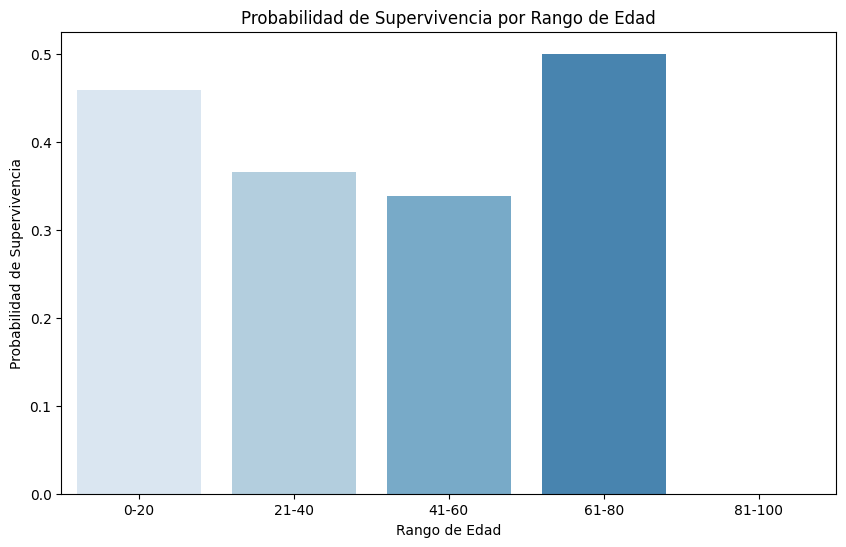

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=sobrevivientes_por_edad.index, y=sobrevivientes_por_edad.values, palette='Blues')
plt.title('Probabilidad de Supervivencia por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Probabilidad de Supervivencia')
plt.show()


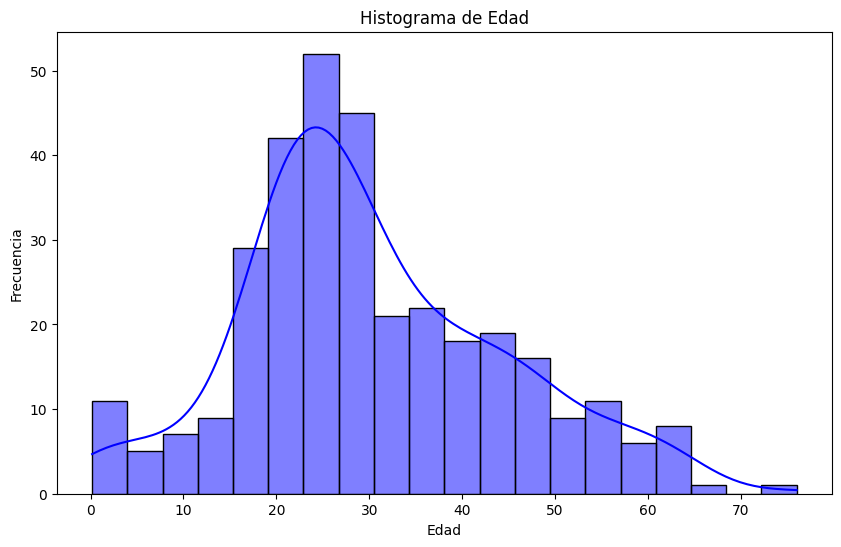

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color='blue')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-46-769db8059271>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivientes_por_edad = df.groupby('Edad_Categorica')['Survived'].mean()


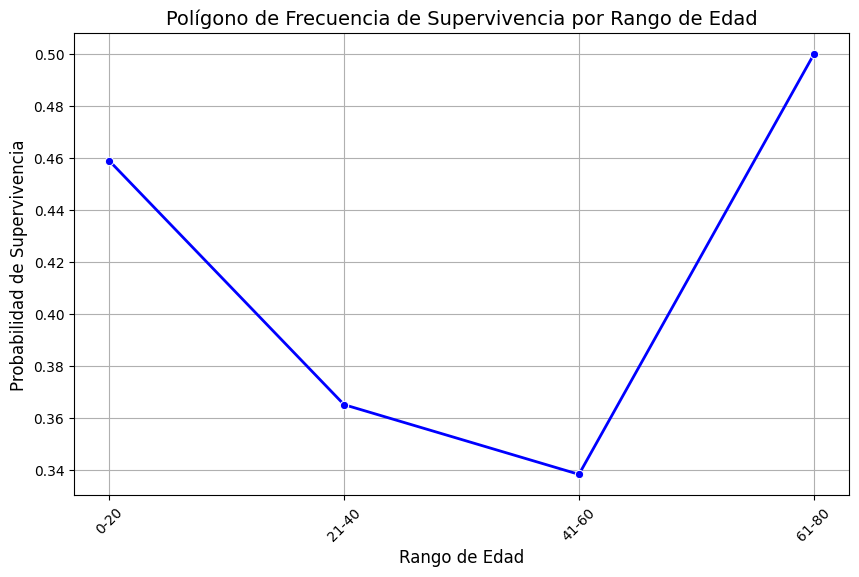

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la probabilidad de supervivencia por cada rango de edad
sobrevivientes_por_edad = df.groupby('Edad_Categorica')['Survived'].mean()

# Crear el polígono de frecuencia de supervivencia
plt.figure(figsize=(10,6))
sns.lineplot(x=sobrevivientes_por_edad.index, y=sobrevivientes_por_edad.values, marker='o', color='blue', linewidth=2)

# Agregar título y etiquetas
plt.title('Polígono de Frecuencia de Supervivencia por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Probabilidad de Supervivencia', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


b. Polígono de frecuencias

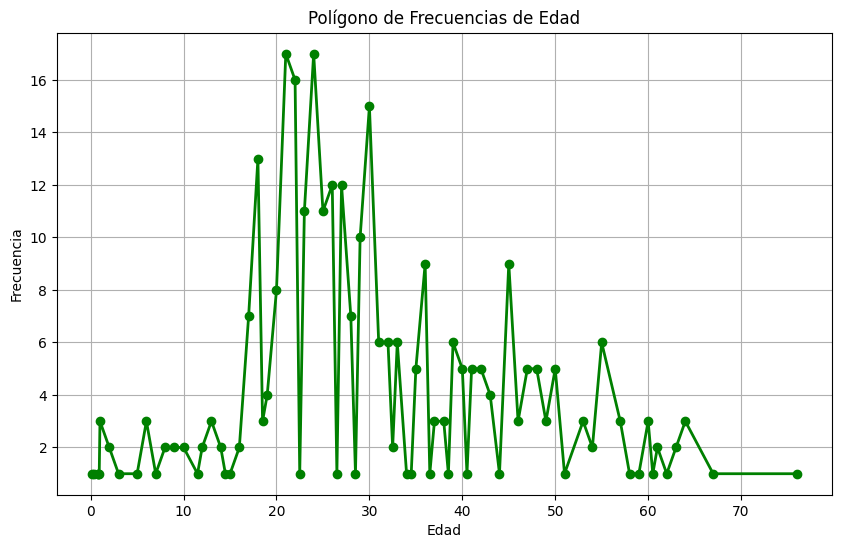

In [ ]:
# Calcular las frecuencias
edad_frecuencias = df['Age'].dropna().value_counts().sort_index()

# Crear el polígono de frecuencias
plt.figure(figsize=(10,6))
plt.plot(edad_frecuencias.index, edad_frecuencias.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Polígono de Frecuencias de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


c. Ojiva

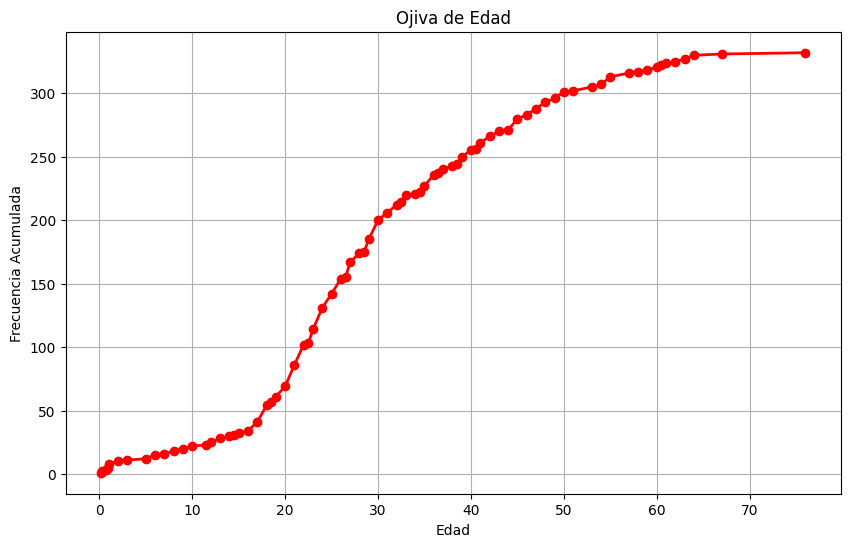

In [ ]:
# Calcular frecuencias acumuladas
edad_acumulada = edad_frecuencias.cumsum()

# Crear la ojiva
plt.figure(figsize=(10,6))
plt.plot(edad_acumulada.index, edad_acumulada.values, marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Ojiva de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True)
plt.show()


<ipython-input-49-b82413b3efec>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivientes_por_edad = df.groupby('Edad_Categorica')['Survived'].mean()


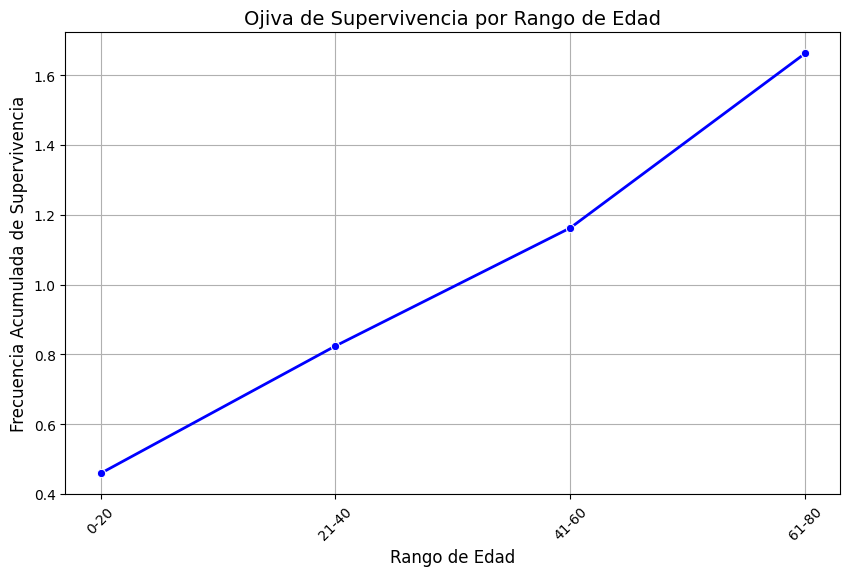

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la probabilidad de supervivencia por cada rango de edad
sobrevivientes_por_edad = df.groupby('Edad_Categorica')['Survived'].mean()

# Calcular la frecuencia acumulada de la probabilidad de supervivencia
frecuencia_acumulada = sobrevivientes_por_edad.cumsum()

# Crear la ojiva de supervivencia
plt.figure(figsize=(10,6))
sns.lineplot(x=sobrevivientes_por_edad.index, y=frecuencia_acumulada, marker='o', color='blue', linewidth=2)

# Agregar título y etiquetas
plt.title('Ojiva de Supervivencia por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Frecuencia Acumulada de Supervivencia', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Segunda Parte: Inferencia Estadística

Identificar el estadístico muestra (media, desvío estándar, proporción)

In [ ]:
import pandas as pd

# Calcular media
media_supervivencia = tabla_supervivencia['Probabilidad de Supervivencia'].mean()
print(f"Media de la probabilidad de supervivencia: {media_supervivencia}")

# Calcular desviación estándar
desviacion_estandar = tabla_supervivencia['Probabilidad de Supervivencia'].std()
print(f"Desviación estándar de la probabilidad de supervivencia: {desviacion_estandar}")

# Calcular proporción de sobrevivientes en el DataFrame original
proporcion_supervivientes = df['Survived'].mean()
print(f"Proporción de sobrevivientes: {proporcion_supervivientes}")


Media de la probabilidad de supervivencia: 0.4155827631599088
Desviación estándar de la probabilidad de supervivencia: 0.07647651992643899
Proporción de sobrevivientes: 0.36363636363636365


La media en la probabilidad de supervivencia sobre la muestra obtenida es 0.416 aproximadamente por lo cual en promedio, un 41.6% de los pasajeros de la muestra sobrevivieron al hundimiento del titanic, la desviación estándar es de 0.076, lo que sugiere que existe una variabilidad en las probabilidades de supervivencia, la proporción de sobrevivientes es de 0.364, es decir, aproximadamente el 36.4% de los pasajeros logró sobrevivir.

Los resultados obtenidos ante la muestra nos permiten observar que la probabilidad de supervivencia promedio es escasa y, que existe una dispersión importante en las probabilidades de supervivencia individuales.

Calculo del intervalo de confianza para los estadísticos muestrales.

In [ ]:
import scipy.stats as stats
import numpy as np

media = tabla_supervivencia['Probabilidad de Supervivencia'].mean()
desviacion_estandar = tabla_supervivencia['Probabilidad de Supervivencia'].std()
n = len(tabla_supervivencia)  # Tamaño de la muestra
confianza = 0.95  # Nivel de confianza (95%)

# Calcular el intervalo de confianza
t_critico = stats.t.ppf(1 - (1 - confianza) / 2, df=n-1)  # t crítico para 95% de confianza

margen_error = t_critico * (desviacion_estandar / np.sqrt(n))  # Margen de error

# Intervalo de confianza
ic_inferior = media - margen_error
ic_superior = media + margen_error

print(f"Intervalo de confianza para la media de supervivencia: ({ic_inferior}, {ic_superior})")


Intervalo de confianza para la media de supervivencia: (0.32062462165933653, 0.510540904660481)


El intervalo de confianza para la media de supervivencia, estimado en un 95% de confianza, se encuentra entre 0.321 y 0.511. Esto implica que, con un nivel de confianza del 95%, se puede afirmar que el verdadero valor de la media de supervivencia de la población (si se tuviera acceso a todos los datos) se encuentra dentro de este rango. En otras palabras, podemos esperar que la proporción de sobrevivientes en la población real sea aproximadamente entre el 32.1% y el 51.1%. Este intervalo refleja una estimación del parámetro poblacional con una cierta variabilidad, dado que se basa en una muestra y no en la población completa.

*• Estimar el error estándar (z,t o h) y utilizar la distribución adecuada(z)*

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats


# Calcular la proporción de sobrevivientes
p = df['Survived'].mean()  # Proporción de sobrevivientes
n = len(df)  # Tamaño de la muestra
confianza = 0.95  # Nivel de confianza (95%)

# Desviación estándar muestral de la probabilidad de supervivencia (media)
media_supervivencia = df['Survived'].mean()
desviacion_estandar = df['Survived'].std()

# Error estándar de la media (utilizando desviación estándar muestral y distribuciones t o Z)
error_estandar_media = desviacion_estandar / np.sqrt(n)

# Calcular el valor crítico t o Z
# Para el valor crítico t, necesitamos los grados de libertad (df = n - 1)
t_critico = stats.t.ppf(1 - (1 - confianza) / 2, df=n-1)  # t crítico para distribución t de Student
Z_critico = stats.norm.ppf(1 - (1 - confianza) / 2)  # Z crítico para distribución normal

# Intervalo de confianza para la media
margen_error_media = t_critico * error_estandar_media
ic_inferior_media = media_supervivencia - margen_error_media
ic_superior_media = media_supervivencia + margen_error_media

# Calcular el error estándar de la proporción
error_estandar_proporcion = np.sqrt((p * (1 - p)) / n)

# Intervalo de confianza para la proporción
margen_error_proporcion = Z_critico * error_estandar_proporcion
ic_inferior_proporcion = p - margen_error_proporcion
ic_superior_proporcion = p + margen_error_proporcion

# Imprimir resultados
print(f"Proporción de sobrevivientes: {p}")
print(f"Tamaño de la muestra: {n}")
print(f"Desviación estándar de la probabilidad de supervivencia: {desviacion_estandar}")
print(f"Error estándar de la media: {error_estandar_media}")
print(f"Valor crítico t (95% confianza): {t_critico}")
print(f"Valor crítico Z (95% confianza): {Z_critico}")

# Intervalo de confianza para la media de supervivencia
print(f"Intervalo de confianza para la media de supervivencia: ({ic_inferior_media}, {ic_superior_media})")

# Error estándar de la proporción
print(f"Error estándar de la proporción: {error_estandar_proporcion}")

# Intervalo de confianza para la proporción de sobrevivientes
print(f"Intervalo de confianza para la proporción de sobrevivientes: ({ic_inferior_proporcion}, {ic_superior_proporcion})")


Proporción de sobrevivientes: 0.36363636363636365
Tamaño de la muestra: 418
Desviación estándar de la probabilidad de supervivencia: 0.48162214093223055
Error estándar de la media: 0.02355690893261843
Valor crítico t (95% confianza): 1.965669151283938
Valor crítico Z (95% confianza): 1.959963984540054
Intervalo de confianza para la media de supervivencia: (0.31733127444791054, 0.40994145282481675)
Error estándar de la proporción: 0.023528713938753408
Intervalo de confianza para la proporción de sobrevivientes: (0.3175209317138614, 0.40975179555886587)



El tamaño de sobrevivientes en la muestra es de 36.4% aproximadamente con una desviación estándar del 0.482, lo que nos muestra es que hay una variabilidad considerable en la probabilidad de sobrevivir, el error estándar de la media es de 0.024, por lo cual la estimación tiene un margen muy pequeño.

El intervalo de confianza de 0.317 a 0.410 nos propone un 95% en el nivel de confianza, y se espera además que el valor verdadero de la media de supervivencia en la población este dentro del rango, por lo cual esto significa que la probabilidad esta en un promedio del 31.7% al 41%.

Del mismo modo, el intervalo de 0.318 a 0.410 respalda esta estimación donde se indica que la proporción de sobrevivientes de la muestra real es de un 95%.

En resumen los resultados nos mostraron que la valoración en la probabilidad de supervivencia tiene una inconsistencia pero con los intervalos podemos hacer inferencia en la probabilidad y los márgenes de error.

* *Calcular el valor del parametro poblacional*




In [ ]:
# Calcular el parámetro poblacional estimado (media y proporción) a partir de la muestra

# Para la media de supervivencia (proporción de supervivientes)
media_supervivencia_estimado = df['Survived'].mean()

# Para la proporción de supervivencia
proporcion_supervivientes_estimado = media_supervivencia_estimado  # En este caso, la proporción es la misma que la media

# Imprimir los resultados
print(f"Valor estimado del parámetro poblacional (media de supervivencia): {media_supervivencia_estimado}")
print(f"Valor estimado del parámetro poblacional (proporción de supervivientes): {proporcion_supervivientes_estimado}")


Valor estimado del parámetro poblacional (media de supervivencia): 0.36363636363636365
Valor estimado del parámetro poblacional (proporción de supervivientes): 0.36363636363636365


La valoración del parámetro poblacional en la media de supervivencia es de 0.364, esto nos demuestra que aproximadamente el 36.4% de los pasajeros sobrevivió, de manera similar en el valor estimado para la proporción nos da una conclusion del 36.4%, podemos decir entonces que la estimación es consistente en la probabilidad de supervivencia sobre la población en cuestión.


# Conclusion

En conclusión, los análisis realizados muestran que aproximadamente el 36.4% de los pasajeros de la muestra sobrevivieron, tanto en términos de la media como de la proporción de supervivientes. La desviación estándar y el error estándar indican una variabilidad moderada en las probabilidades de supervivencia. Los intervalos de confianza calculados para la media y la proporción de supervivientes sugieren que, con un nivel de confianza del 95%, el verdadero valor de estos parámetros en la población se encuentra dentro de los rangos estimados, lo que permite hacer inferencias sobre la probabilidad de supervivencia con un margen de error relativamente pequeño.







# Bibliografia

https://colab.research.google.com/drive/1poDO9qkobr0KAA2Lc5eWEzo9hKrxqhFu#scrollTo=vkGZarn8LgG5